### Histogram Equalization for Image Enhancement
#### Theroy
Image processing is a crucial field in computer vision and digital image analysis. Two common techniques for enhancing the contrast of grayscale images are **Histogram Equalization** and **Contrast Limited Adaptive Histogram Equalization (CLAHE)**. These methods improve the visibility of details in an image by redistributing pixel intensities.
#### Histogram Equalization
Histogram Equalization is a global contrast enhancement technique that spreads out the intensity values of an image. It works by transforming the intensity distribution of the image to approximate a uniform distribution.
**Steps**:
1. **Compute the Histogram**: Count the frequency of each intensity value in the image.
2. **Calculate the Cumulative Distribution Function (CDF)**: Compute the cumulative sum of the histogram values.
3. **Normalize the CDF**: Scale the CDF to map intensity values to the range [0, 255].
4. **Map Pixel Values**: Replace each pixel intensity with its corresponding value from the normalized CDF.
**Advantages**:
- Simple and effective for global contrast enhancement.
- Enhances the overall visibility of the image.
**Limitations**:
- May over-enhance noise in homogeneous regions.
- Not suitable for images with varying illumination.
#### Contrast Limited Adaptive Histogram Equalization (CLAHE)**
CLAHE is an advanced version of histogram equalization that works adaptively on small regions (tiles) of the image. It prevents over-amplification of noise by limiting the contrast enhancement.
**Steps**:
1. **Divide the Image into Tiles**: Split the image into non-overlapping regions (e.g., 8x8 tiles).
2. **Compute Local Histograms**: Calculate the histogram for each tile.
3. **Clip the Histogram**: Limit the histogram values to a predefined clip limit to avoid over-enhancement.
4. **Redistribute Intensities**: Normalize the clipped histogram and map pixel values within each tile.
5. **Interpolate Between Tiles**: Smoothly combine the tiles to avoid boundary artifacts.
Advantages:
- Enhances local contrast in specific regions.
- Prevents noise amplification through clipping.
- Suitable for images with varying illumination.
**Limitations**:
- Computationally more expensive than global histogram equalization.
- Requires parameter tuning (e.g., clip limit, tile size).
#### Summary
In this lab, we implemented both **manual histogram equalization** and **manual CLAHE** using Python. These techniques were applied to a grayscale image to observe their effects on contrast enhancement. The results were visualized using histograms and image plots to compare the original and processed images.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def manual_histogram_equalization(image: np.ndarray):
	hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
	cdf = hist.cumsum()
	cdf_normalized = cdf * (255 / cdf[-1])
	equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)
	return equalized_image.reshape(image.shape).astype(np.uint8)

def manual_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
	h, w = image.shape
	tile_h, tile_w = h // tile_grid_size[0], w // tile_grid_size[1]
	clahe_image = np.zeros_like(image, dtype=np.uint8)
	
	for i in range(tile_grid_size[0]):
		for j in range(tile_grid_size[1]):
			y_start, y_end = i * tile_h, (i + 1) * tile_h
			x_start, x_end = j * tile_w, (j + 1) * tile_w
			tile = image[y_start:y_end, x_start:x_end]
			
			hist, bins = np.histogram(tile.flatten(), bins=256, range=[0, 256])
			hist = np.clip(hist, 0, clip_limit * tile.size / 256)
			hist = hist / hist.sum()

			cdf = hist.cumsum()
			cdf_normalized = cdf * 255
			

			tile_equalized = np.interp(tile.flatten(), bins[:-1], cdf_normalized)
			clahe_image[y_start:y_end, x_start:x_end] = tile_equalized.reshape(tile.shape).astype(np.uint8)
	
	return clahe_image

In [4]:
image = cv2.imread("stdimgs/boat.png", cv2.IMREAD_GRAYSCALE)

manual_equalized_image = manual_histogram_equalization(image)

manual_clahe_image = manual_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8))


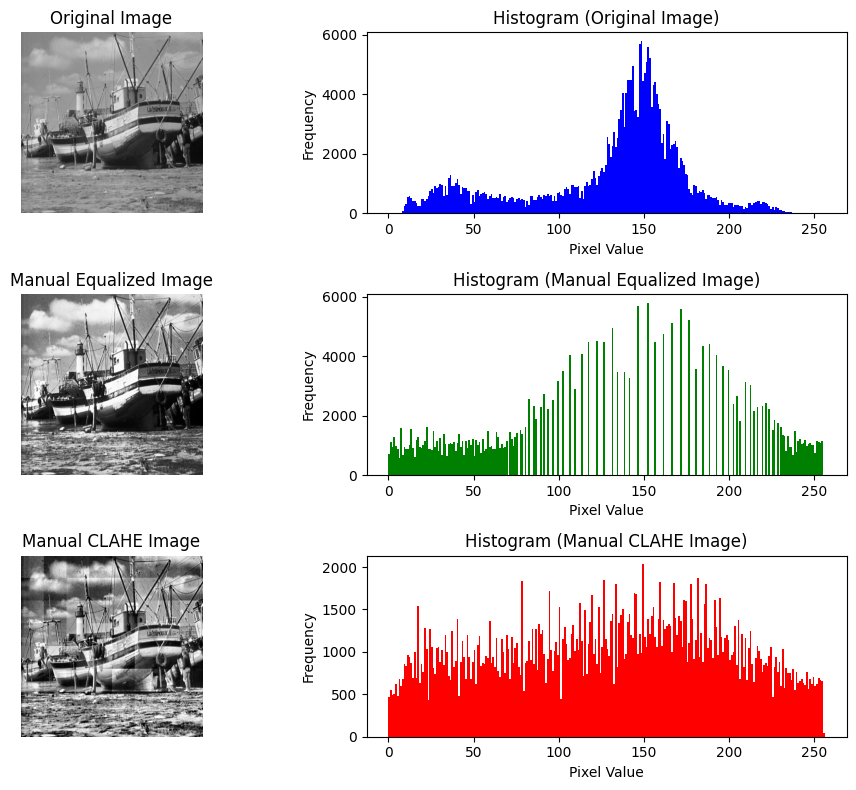

In [6]:
images = [image, manual_equalized_image, manual_clahe_image]
titles = ["Original Image", "Manual Equalized Image", "Manual CLAHE Image"]
colors = ["blue", "green", "red"]

plt.figure(figsize=(15, 8))
for idx, (img, title, color) in enumerate(zip(images, titles, colors)):
	plt.subplot(3, 3, 3 * idx + 1)
	plt.title(title)
	plt.imshow(img, cmap="gray")
	plt.axis("off")

	plt.subplot(3, 3, 3 * idx + 2)
	plt.title(f"Histogram ({title})")
	plt.hist(img.ravel(), bins=256, range=(0, 256), color=color)
	plt.xlabel("Pixel Value")
	plt.ylabel("Frequency")
plt.tight_layout()